### Import appropriate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotnine as p9
import statsmodels as sm
from statsmodels.stats import power as pwr
from scipy import stats
import math as ma
warnings.filterwarnings('ignore')

### Read in the data

In [2]:
data = pd.read_csv('../notebooks/data/merged_data.csv')

print(f'Shape of data df: {data.shape}')
display(data[:5]) # observe the first 5 rows of the data

Shape of data df: (1305, 368)


,meds_methadone_0,meds_buprenorphine_0,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,...,race_amer_ind,race_Asian,race_Black,race_pacific_isl,race_White,medication,total_visits,TNT,CNT,responder
0,0.0,8.0,0.0,160.0,0.0,320.0,0.0,192.0,0.0,384.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,20,8,1
1,0.0,8.0,0.0,48.0,0.0,48.0,0.0,60.0,0.0,48.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,6,4,0
2,30.0,0.0,170.0,0.0,310.0,0.0,420.0,0.0,360.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,26,0,0,0
3,0.0,16.0,0.0,152.0,0.0,192.0,0.0,160.0,0.0,64.0,...,0.0,0.0,0.0,0.0,1.0,2.0,26,4,1,0
4,0.0,16.0,0.0,8.0,0.0,8.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,2.0,3,0,0,0


In [20]:
pd.set_option('display.max_rows', None) # display all columns

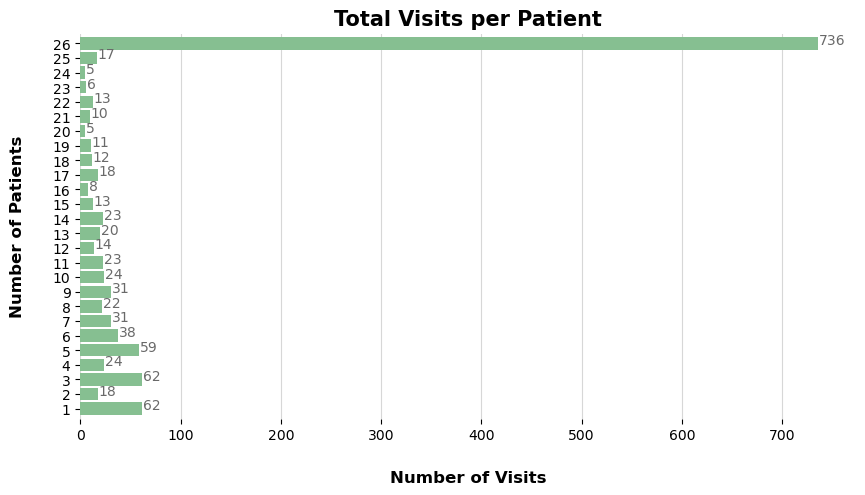

In [38]:
# plot treatment retention
ax = data.total_visits.value_counts().sort_index(ascending=True).plot(kind='barh', figsize=(10, 5), color='#86bf91', zorder=2, width=0.85)
ax.set_xlabel('Number of Visits', labelpad=20, weight='bold', size=12)
ax.set_ylabel('Number of Patients', labelpad=20, weight='bold', size=12)
ax.grid(axis='x', alpha=0.5, zorder=0)
ax.set_axisbelow(True)
plt.title('Total Visits per Patient', weight='bold', size=15)
# annotate bars with values
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
# remove borders
sns.despine(left=True, bottom=True)
plt.show()

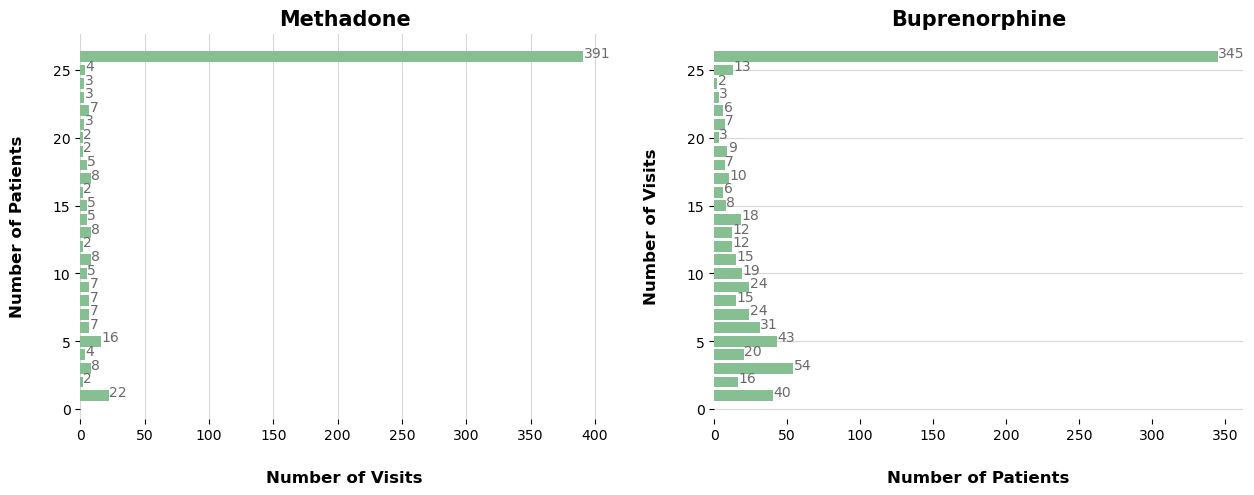

In [45]:
# plot difference in tropout by medication

# calculate dropout rate by medication
methadone_dropout = data.loc[data.medication==1].total_visits.value_counts().sort_index(ascending=True)
buprenorphine_dropout = data.loc[data.medication==2].total_visits.value_counts().sort_index(ascending=True)

# create two subplots next to each other
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot methadone dropout
ax1.barh(methadone_dropout.index, methadone_dropout.values, color='#86bf91', zorder=2)
ax1.set_xlabel('Number of Visits', labelpad=20, weight='bold', size=12)
ax1.set_ylabel('Number of Patients', labelpad=20, weight='bold', size=12)
ax1.grid(axis='x', alpha=0.5, zorder=0)
ax1.set_axisbelow(True)
ax1.set_title('Methadone', weight='bold', size=15)
# annotate bars with values
for i in ax1.patches:
    ax1.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
# remove borders
sns.despine(left=True, bottom=True)

# plot buprenorphine dropout
ax2.barh(buprenorphine_dropout.index, buprenorphine_dropout.values, color='#86bf91', zorder=2)
ax2.set_xlabel('Number of Patients', labelpad=20, weight='bold', size=12)
ax2.set_ylabel('Number of Visits', labelpad=20, weight='bold', size=12)
ax2.grid(axis='y', alpha=0.5, zorder=0)
ax2.set_axisbelow(True)
ax2.set_title('Buprenorphine', weight='bold', size=15)
# annotate bars with values
for i in ax2.patches:
    ax2.text(i.get_width()+.3, i.get_y()+.38, str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
# remove borders
sns.despine(left=True, bottom=True)

plt.show()

In [3]:
# remove object columns
data = data.select_dtypes(exclude=['object'])

## Dimensionality Reduction

In [4]:
opiates = [col for col in data.columns if 'Opiate300' in col]+['responder']

opiates = data[opiates]

<Axes: >

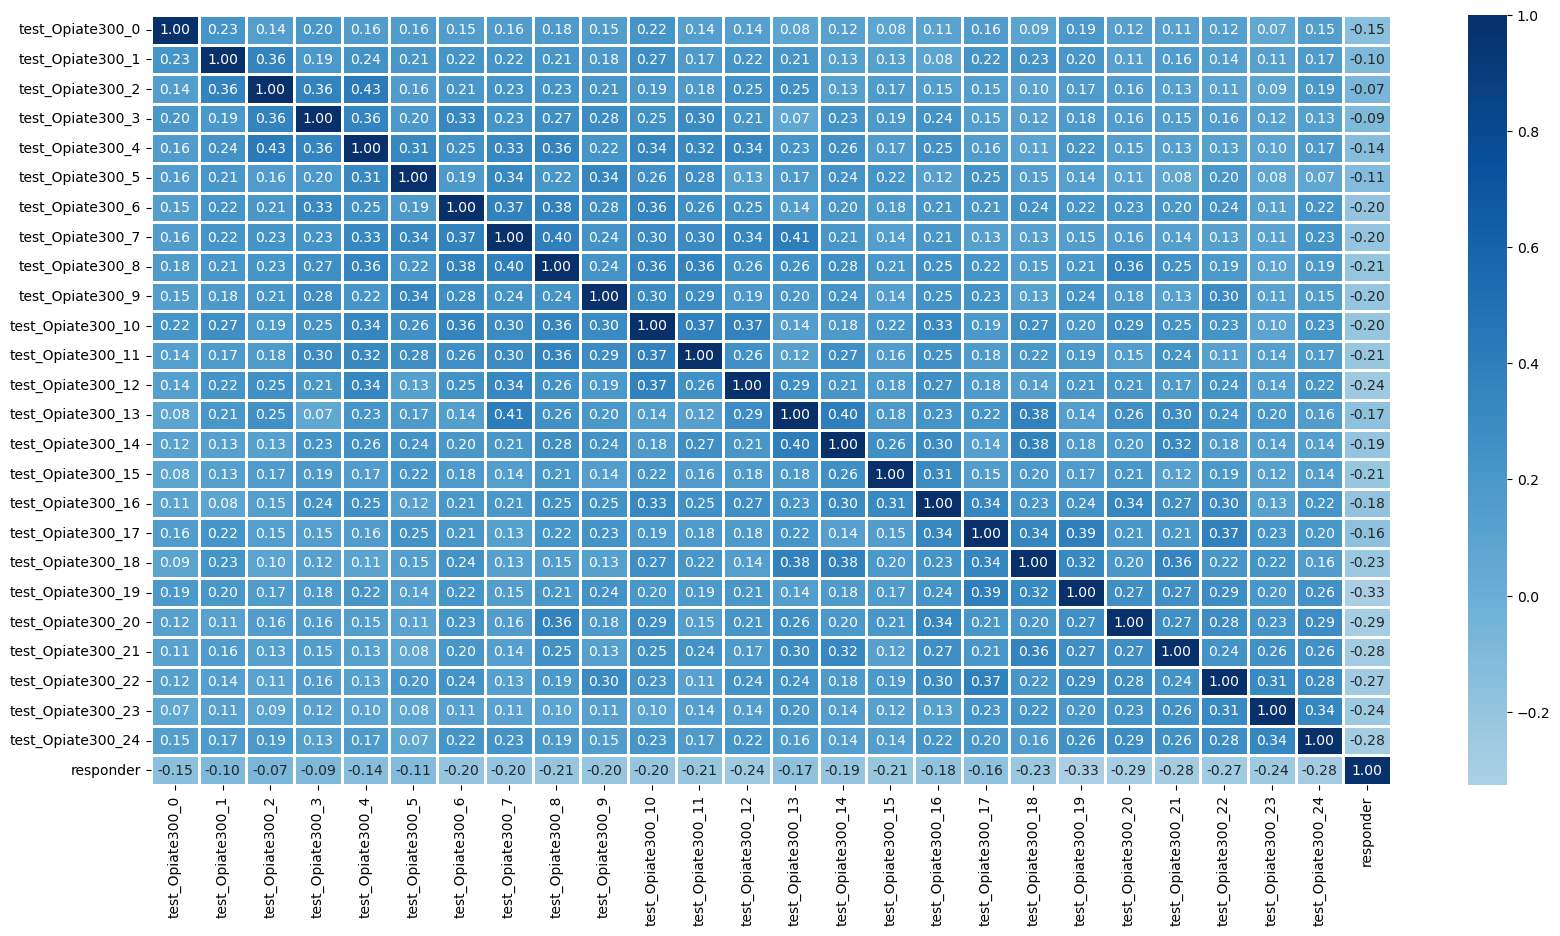

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(opiates.corr(), center=0, linewidths=1, annot=True, fmt='.2f', cmap='Blues')

In [6]:
# remove object columns
data = data.select_dtypes(exclude=['object'])

data.shape

(1305, 368)

In [7]:
data = data.fillna(0)

In [8]:
from sklearn.manifold import TSNE

m = TSNE(learning_rate=50)

tsne_features = m.fit_transform(data)


In [9]:
data['X'] = tsne_features[:,0]
data['Y'] = tsne_features[:,1]

In [10]:
data.columns

Index(['meds_methadone_0', 'meds_buprenorphine_0', 'meds_methadone_1',
       'meds_buprenorphine_1', 'meds_methadone_2', 'meds_buprenorphine_2',
       'meds_methadone_3', 'meds_buprenorphine_3', 'meds_methadone_4',
       'meds_buprenorphine_4',
       ...
       'race_Black', 'race_pacific_isl', 'race_White', 'medication',
       'total_visits', 'TNT', 'CNT', 'responder', 'X', 'Y'],
      dtype='object', length=370)

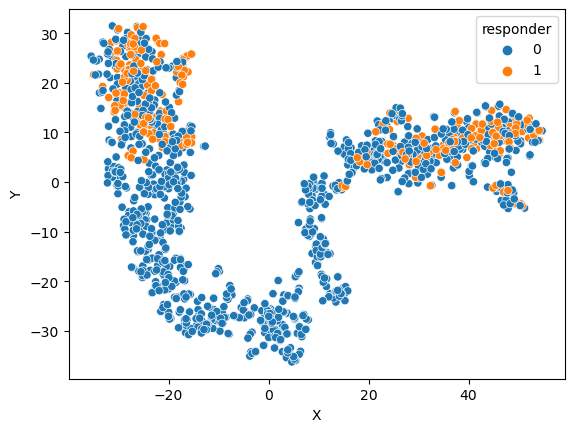

In [11]:
sns.scatterplot(x='X', y='Y', hue='responder', data=data)
plt.show()

In [12]:
cols = ['wsu','tnt','responder']

cols

['wsu', 'tnt', 'responder']

In [14]:
y = data['responder']
x = data.drop(['responder'], axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train, y_train)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, svc.predict(x_test)))
print(accuracy_score(y_train, svc.predict(x_train)))

0.789272030651341
0.8170498084291188


In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.005)
sel.fit(data / data.mean())

mask = sel.get_support()
mask

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
reduced_df = data.loc[:, mask]
reduced_df.shape

In [ ]:
reduced_df.columns

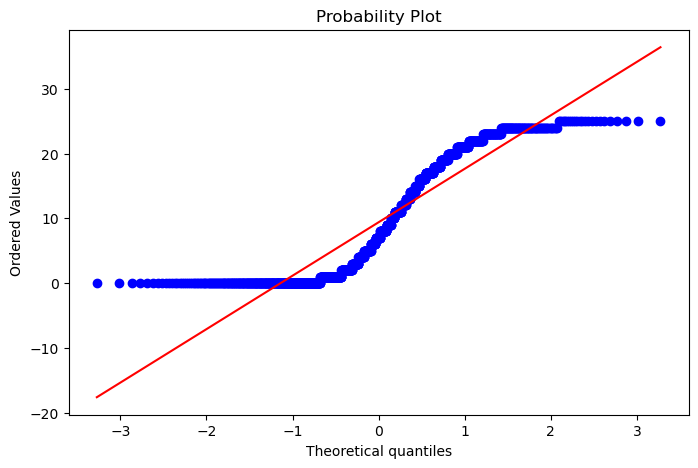

In [18]:
# plot qq plot to check normality
fig, ax = plt.subplots(figsize=(8, 5))
stats.probplot(data.TNT, plot=ax)
plt.show()


In [ ]:
t_result = stats.ttest_1samp(Sample_A, 7.5)

alpha = 0.05
if (t_result[1] < alpha):
    print("Mean is not equal to 7.5")
else:
    print("No significant difference")

In [ ]:
medication = data.medication.value_counts()

chi = stats.chisquare(medication)

print(chi)

In [ ]:
sex = data.Sex.value_counts()

chi = stats.chisquare(sex)

print(chi)

In [ ]:
data.columns

In [ ]:
table = pd.crosstab(data.medication, data.responder)

table

In [ ]:
fisher = stats.fisher_exact(table, alternative='two-sided')

alpha = 0.05

if (fisher[1] < alpha):
    print("Proportion of medication differs significantly")
else:   
    print('No significant difference')

In [ ]:
# scatter plot with x=wsu and y=tnt and color by responder
sns.scatterplot(x='wsu', y='tnt', hue='responder', data=data)


In [ ]:
chi = stats.fisher_exact(table, alternative='two-sided')
print(chi[1])

In [ ]:
pearson = stats.pearsonr(data.wsu, data.tnt)
print(pearson)

In [ ]:
data.loc[(data.wsu==25)&(data.responder==0),[col for col in data.columns if 'Opiate300' in col]+['wsu','tnt','responder']]

In [ ]:
# create boxplot for medication and tnt variables
sns.boxplot(x='medication', y='wsu', data=data)

In [ ]:
# create density plot with 'medication' and 'wsu' variables
ax = sns.kdeplot(data=data, x='wsu', hue='medication', fill=True, alpha=0.5, palette=['orange', 'blue'])
ax.set(xlabel='WSU', ylabel='Density')
ax.set_title('WSU Density Plot')
plt.show()


In [ ]:
seed = 1916

sample_a = data.loc[data.medication==1].sample(n=30, random_state=seed)
sample_b = data.loc[data.medication==2].sample(n=30, random_state=seed)

t_result = stats.ttest_ind(sample_a.wsu, sample_b.wsu)

alpha = 0.05

if (t_result[1] < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

In [ ]:
yields2018 = [60.2, 12, 13.8, 91.8, 50]
yields2019 = [63.2, 15.6, 14.8, 96.7, 53]

ttest = stats.ttest_rel(yields2018, yields2019)

print(ttest[1])

In [ ]:
new_data = data.loc[data.total_visits==26]

In [ ]:
# Create model
formula = 'tnt ~ responder + medication'
model = sm.api.formula.ols(formula, data=data).fit()

# Perform ANOVA and print table
aov_table = sm.api.stats.anova_lm(model, typ=2)
print(aov_table)

In [ ]:
data.columns

In [ ]:
# Run the ANOVA
model = sm.api.formula.ols('wsu ~ responder + medication + responder:medication', data = data).fit()

# Extract our table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# Print the table
print(aov_table)

## Calculating Sample Size

In [ ]:
# assumptions 

effect_size = .1
power = .5
alpha = .05
ratio = 1.0

swimmercount = float(len(athletes[athletes.Sport=='Swimming']))
athletecount = float(len(athletes[athletes.Sport=='Athletics']))
ratio = swimmercount / athletecount

analysis = pwr.TTestIndPower()

ssresult =  analysis.solve_power(
    effect_size=effect_size,
    power=power,
    alpha=alpha,
    ratio=1.0,
    nobs1=None)
print(ssresult)

In [ ]:
subset = athletes.sample(n=500, random_state= 1007)
print(stats.ttest_ind(subset[subset.Sport == "Athletics"].Weight, subset[subset.Sport=='Swimming'].Weight ))

## Calculating Effect Sizes

In [ ]:
# Set parameters
alpha = 0.05
power = 0.8
ratio = float(len(____)) / len(athletes[athletes.Sport == "Athletics"])
samp_size = len(athletes[____])

# Initialize analysis & calculate sample size
analysis = pwr.____
esresult = analysis.solve_power(effect_size = ____, 
                                power = ____, 
                                nobs1 = ____, 
                                ratio = ____, 
                                alpha = ____)
print(____)

In [ ]:
mean_tnt = new_data['TNT'].mean()
sns.kdeplot(data=new_data, x='wsu', fill=True, alpha=0.5)
plt.axvline(mean_wsu, color='red', linestyle='--', label='Mean')
plt.title('Distribution of WSU by Medication')
plt.legend()
plt.show()


In [ ]:
new_data.wsu.mean()

In [ ]:
med_group_1 = data.loc[
    (data.total_visits==26)&
    (data.medication==1)&
    (data.responder==1),
    ['patdeid','tnt']
]

med_group_2 = data.loc[ 
    (data.total_visits==26)&
    (data.medication==2)&
    (data.responder==1),
    ['patdeid','tnt']
]


In [ ]:
# create two density plots for the two groups
sns.distplot(med_group_1, hist=False, label='Methadone', kde_kws={'fill': True})
sns.distplot(med_group_2, hist=False, label='Buprenorphine', kde_kws={'fill': True})

plt.title('Methadone vs. Buprenorphine')
plt.xlabel('total negative tests')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# create two density plots for the two groups
sns.distplot(med_group_1, hist=False, label='Methadone', kde_kws={'fill': True})
sns.distplot(med_group_2, hist=False, label='Buprenorphine', kde_kws={'fill': True})

plt.title('Methadone vs. Buprenorphine')
plt.xlabel('total negative tests')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()


### Helper Functions
We will create 2 helper functions
1.  test_df() - creates a dataframe for a test or survey by drug class
2.  test_plot() - plots the results for easy interpretation

In [ ]:
def test_df(prefix, drug_class):
    """
    Extracts and aggregates test results or self reported use by week of treatment.

    Args:
        prefix (str): The prefix indicating the type of data ('survey' or 'test').
        test_string (str): The specific test string to extract.

    Returns:
        pandas.DataFrame: A DataFrame containing the aggregated sum of positive opiate tests for each column.
    """
    # assert prefix is either 'survey' or 'treatment'
    assert prefix in ['survey', 'test'], 'prefix must be either survey or test'

    if prefix == 'survey':
        prefix = 'sru'
    else:
        prefix = 't' 

    # extract positive opiate tests for each week of treatment
    test = data.loc[:,['patdeid']+[col for col in data.columns if prefix+'_'+drug_class+'_' in col]]

    # remove the prefix from the column names
    test.columns = test.columns.str.replace(prefix+'_'+drug_class+'_', '')

    # create sum dictionary for each column
    test_dict = {col:'sum' for col in test.columns if col != 'patdeid'}

    # use groupby with patdeid as index and test_dict as columns
    test = test.groupby('patdeid').agg(test_dict)

    # aggregate the sum of positive tests or surveys for each column
    test = test.sum()

    # turn into dataframe
    test = pd.DataFrame(test)

    # rename column prefix + '_' 
    test.columns = [prefix+'_'+drug_class]

    return test

In [ ]:
def test_plot(prefix, drug_class):
    """
    Plots a time series of positive opiate tests or self-reported use for each week of treatment.

    Args:
        prefix (str): The prefix indicating the type of data. Must be either 'survey' or 'test'.
        drug_class (str): The drug class to analyze.

    Raises:
        AssertionError: If the prefix is not 'survey' or 'test'.

    Returns:
        None
    """
    # assert prefix is either 'survey' or 'test'
    assert prefix in ['survey', 'test'], 'prefix must be either survey or test'

    if prefix == 'survey':
        prefix = 'sru'
    else:
        prefix = 't'


    # extract positive opiate tests for each week of treatment
    test = data.loc[:,['patdeid']+[col for col in data.columns if prefix+'_'+drug_class+'_' in col]]

    # remove the prefix from the column names
    test.columns = test.columns.str.replace(prefix+'_'+drug_class+'_', '')

    # create sum dictionary for each column
    test_dict = {col:'sum' for col in test.columns if col != 'patdeid'}

    # use groupby with patdeid as index and test_dict as columns
    test = test.groupby('patdeid').agg(test_dict)

    # aggregate the sum of positive opiate tests for each column
    test = test.sum()

    # replace "Tests" with "Self Reported Use" in the title
    if 'sru' in prefix:
        plot_type = 'Self Reported Use'
    else:
        plot_type = 'Positive Tests'

    # for test_string, make first letter uppercase
    drug_class = drug_class[0].upper() + drug_class[1:]

    # plot time series of positive opiate tests
    ax = test.plot(kind='bar', figsize=(10,6), title=f'{drug_class} {plot_type}')
    ax.set_xlabel('Weeks of Treatment')
    ax.set_ylabel(f'Total {drug_class} {plot_type}')

    plt.show()

In [ ]:
cannabis = test_df('test', 'Cannabinoids')
opioids = test_df('test', 'Opiate300')


In [ ]:
# create a 2 way anova to test between cannabis and opioids
model = sm.api.formula.ols('test_Cannabinoids ~ test_Opiate300', data=data).fit()

# extract the anova table
aov_table = sm.api.stats.anova_lm(model, typ=2)

# print the table
print(aov_table)

In [ ]:
# create function to provide a feed forward analysis of all features with regression in statsmodels wsu as target
def feed_forward(data, target):
    """
    Performs a feed forward analysis of all features with regression in statsmodels.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        target (str): The target variable.

    Returns:
        None
    """
    # create a list of all features
    features = [col for col in data.columns if col != target]

    # create a string of all features
    feature_string = ' + '.join(features)

    # create a formula for the model
    formula = target + ' ~ ' + feature_string

    # create the model
    model = sm.api.formula.ols(formula, data=data).fit()

    # extract the anova table
    aov_table = sm.api.stats.anova_lm(model, typ=2)

    # print the table
    print(aov_table)